In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
#from tensorflow import keras
#Используем костыль для исправления IntelliSense для keras по гайду:
#https://stackoverflow.com/questions/71000250/import-tensorflow-keras-could-not-be-resolved-after-upgrading-to-tensorflow-2
import keras.api._v2.keras as keras
from keras import layers
from keras import losses
from keras.datasets import mnist
import numpy as np
from emnist import list_datasets

In [19]:
print(list_datasets())

(x_train,y_train), (x_test,y_test)=mnist.load_data()

from emnist import extract_training_samples
#x_train, y_train = extract_training_samples('digits')
x_train, y_train = extract_training_samples('byclass')
#x_train, y_train = extract_training_samples('letters')

num_classes=62#10
input_shape = (28, 28, 1)

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#x_train_l, y_train_l = extract_training_samples('letters')

print()


print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
#print("Train Letters X=%s, y=%s"%(x_train_l.shape,y_train_l.shape))
#print("Test X=%s, y=%s"%(x_test1.shape,y_test.shape))



print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
print("Test X=%s, y=%s"%(x_test.shape,y_test.shape))
print(x_test[0].shape)

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

Train X=(697932, 28, 28, 1), y=(697932, 62)
Train X=(697932, 28, 28, 1), y=(697932, 62)
Test X=(10000, 28, 28, 1), y=(10000, 62)
(28, 28, 1)


In [20]:
model=keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",use_bias=True,
                                        kernel_initializer=tf.keras.initializers.glorot_normal(),
                                        bias_initializer=tf.keras.initializers.zeros()),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",use_bias=True,
                                        kernel_initializer=tf.keras.initializers.glorot_normal(),
                                        bias_initializer=tf.keras.initializers.zeros()),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]#52 Буквы, 10 цифрф
 )
print(model.output_shape)
print(str(model.summary()))

(None, 62)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)  

In [21]:
model.compile(
    #SparseCategoricalCrossentropy - ужастно работает на EMnist. CategoricalCrossentropy + категории топчик.
    loss=losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [22]:
#model.fit(x_train,y_train,batch_size=1,epochs=5,shuffle=True)

In [ ]:
print("x_train=",x_train.shape,"y_train",y_train.shape)
model.save("saved_model_CNN/EMNIST_learn_epoch_start.h5")
for i in range(1,31):
    print("Epoch "+str(i))
    model.save('saved_model_CNN/EMNIST_learn_epoch_start='+str(i)+".h5")
    model.fit(x_train,y_train,batch_size=100,epochs=1,shuffle=True)
    #,validation_data=(x_test,y_test)
    results=model.evaluate(x_test,y_test,batch_size=100,verbose=2)
    print(str(results))
    model.save('saved_model_CNN/EMNIST_learn_epoch_end='+str(i)+".h5")
model.save("saved_model_CNN/EMNIST_learn_done.h5")

x_train= (697932, 28, 28, 1) y_train (697932, 62)
Epoch 1
6980/6980 [==============================] - 181s 26ms/step - loss: 0.6277 - accuracy: 0.7984
100/100 - 1s - loss: 0.5175 - accuracy: 0.7991 - 836ms/epoch - 8ms/step
[0.5174663662910461, 0.7990999817848206]
Epoch 2
6980/6980 [==============================] - 201s 29ms/step - loss: 0.4732 - accuracy: 0.8364
100/100 - 1s - loss: 0.4343 - accuracy: 0.8165 - 882ms/epoch - 9ms/step
[0.4343414604663849, 0.8165000081062317]
Epoch 3
3603/6980 [==============>...............] - ETA: 1:38 - loss: 0.4499 - accuracy: 0.8428

In [ ]:
#model.fit(x_train,y_train,batch_size=32,epochs=5)

In [ ]:
#model.load_weights("saved_model3/EMNIST_learn_epoch_start.h5")

313/313 - 1s - loss: 0.0942 - accuracy: 0.9722 - 1s/epoch - 4ms/step
[0.09421199560165405, 0.9721999764442444]
3940
(28, 28, 3)
(28, 28, 1)
7


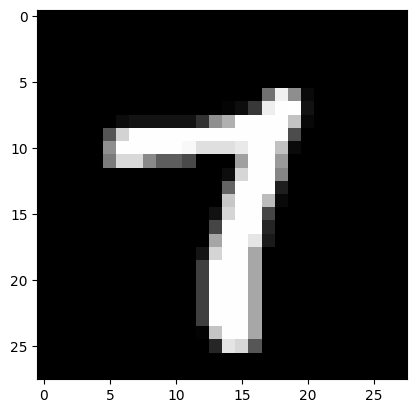

In [17]:
results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
print(str(results))
value=np.random.randint(0,10000)
print(value)
for id in range(len(y_train)):
    #print(labels[id])
    #break
    #22 - M big
    if(y_train.argmax()==8):
        value=id
        break
        


#print(x_train[value].shape)

single=x_train[value]
image=np.zeros((28,28,3))
print(image.shape)

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
        for c in range(0,image.shape[2]):
            image[y,x,c]=single[y][x]



print(single.shape)
#print(single)

singleReady=np.zeros((1,28,28))

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
            singleReady[0][y][x]=single[y][x]

print(model.predict(singleReady,batch_size=1).argmax())

plt.imshow(image)
plt.show()

In [ ]:
model.save('saved_model_CNN/EMNIST_byclass_done.h5')

In [ ]:
#results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
#print(str(results))
#value=np.random.randint(0,10000)

id=22
for v in y_train:
    if(v.argmax()==id):
        print(id)
        ShowImage(v)
        break
        #id+=1
currentIteration=0
'''for v in y_train:
    if(v==id):
        print(id,v)
        ShowImage(v)
        currentIteration+=1
        id+=1    
    if(currentIteration==10):
        break'''


def ShowImage(value:int):
    print(x_train[value].shape)

    single=x_train[value]
    image=np.zeros((28,28,3))
    print(image.shape)

    for y in range(0,image.shape[0]):
        for x in range(0,image.shape[1]):
            for c in range(0,image.shape[2]):
                image[y,x,c]=single[y*28+x]



    #print(single.shape)
    #print(single)

    #singleReady=np.zeros((1,28*28))

    #for y in range(0,image.shape[0]):
    #    for x in range(0,image.shape[1]):
    #            singleReady[0][y*28+x]=single[y*28+x]

    #print(model.predict(singleReady,batch_size=1).argmax())

    plt.imshow(image)
    plt.show()